# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
import numpy as np

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/google colab/fraudTest.csv')

In [6]:
df.drop('Unnamed: 0', axis =1, inplace = True)

In [7]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


In [8]:
df.shape

(555719, 22)

In [9]:
df['is_fraud'].nunique()

2

In [10]:
df['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [13]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [14]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

<ipython-input-14-99f721e4ce0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [15]:
df_select["day_var"] = [i.day_of_week for i in df_select["trans_date_trans_time"]]

<ipython-input-15-510e61a9e7df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["day_var"] = [i.day_of_week for i in df_select["trans_date_trans_time"]]


In [16]:
df_select.head(3)

,trans_date_trans_time,category,amt,city_pop,is_fraud,day_var
0,2020-06-21 12:14:25,personal_care,2.86,333497,0,6
1,2020-06-21 12:14:33,personal_care,29.84,302,0,6
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0,6


In [17]:
df=df_select[['day_var', 'category', 'amt', 'city_pop', 'is_fraud']]

In [18]:
# assign the weekend value 1 and the rest of the week as zero
df['day_var'] = df_select['day_var'].apply(lambda day: 0 if day <5 else 1 )

<ipython-input-18-8cdff4c3ddb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_var'] = df_select['day_var'].apply(lambda day: 0 if day <5 else 1 )


In [19]:
df.head(2)

,day_var,category,amt,city_pop,is_fraud
0,1,personal_care,2.86,333497,0
1,1,personal_care,29.84,302,0


In [20]:
df = pd.get_dummies(df, drop_first= True)

In [21]:
df.head(3)

,day_var,amt,city_pop,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,1,2.86,333497,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,29.84,302,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,41.28,34496,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [22]:
df.shape

(555719, 17)

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop('is_fraud', axis =1)
y = df['is_fraud']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
X_test.head(2)

,day_var,amt,city_pop,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
166998,0,18.13,1383,0,0,0,0,1,0,0,0,0,0,0,0,0
437658,1,101.43,566,0,0,0,1,0,0,0,0,0,0,0,0,0


In [27]:
y.head(2)

0    0
1    0
Name: is_fraud, dtype: int64

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [28]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [29]:
ros = RandomOverSampler(random_state=101)
ros.fit(X_train,y_train)
X_oversampled, y_oversampled = ros.fit_resample(X_train,y_train)

rus = RandomUnderSampler(random_state=101)
rus.fit(X_train,y_train)
X_undersampled, y_undersampled = rus.fit_resample(X_train,y_train)

oversample = SMOTE(random_state=101, k_neighbors=5)
X_SMOTE,y_SMOTE = oversample.fit_resample(X_train,y_train)

In [30]:
X_oversampled.shape

(775026, 16)

In [31]:
y_oversampled.value_counts()

0    387513
1    387513
Name: is_fraud, dtype: int64

In [32]:
X_undersampled.shape

(2980, 16)

In [33]:
y_undersampled.value_counts()

0    1490
1    1490
Name: is_fraud, dtype: int64

In [34]:
X_SMOTE.shape

(775026, 16)

# 3.) Train three logistic regression models 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

#### Model A) Oversampled data

In [36]:
logistic = LogisticRegression()
scalar = StandardScaler()

In [46]:
pipe = Pipeline(steps = [("scalar", scalar), ("model", logistic)])
pipe

Pipeline(steps=[('scalar', StandardScaler()), ('model', LogisticRegression())])

In [38]:
lasso_oversampled = pipe.fit(X_oversampled, y_oversampled)

#### Model B) Undersampled data

In [43]:
lasso_undersampled = pipe.fit(X_undersampled, y_undersampled)

#### Model C) SMOTE data

In [47]:
lasso_SMOTE = pipe.fit(X_SMOTE, y_SMOTE)

# 4.) Test the three models

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


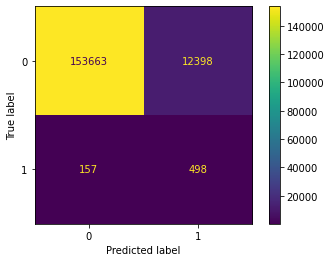

In [39]:
plot_confusion_matrix(lasso_oversampled, X_test, y_test)

In [40]:
pred_over = lasso_oversampled.predict(X_test)

In [41]:
print(classification_report(y_test,pred_over))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    166061
           1       0.04      0.76      0.07       655

    accuracy                           0.92    166716
   macro avg       0.52      0.84      0.52    166716
weighted avg       1.00      0.92      0.96    166716



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


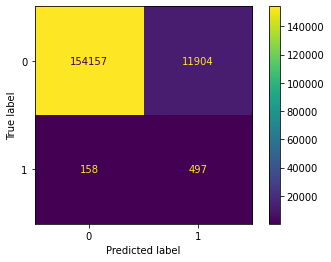

In [44]:
plot_confusion_matrix(lasso_undersampled, X_test, y_test)

In [45]:
pred_under = lasso_undersampled.predict(X_test)
print(classification_report(y_test,pred_under))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    166061
           1       0.04      0.76      0.08       655

    accuracy                           0.93    166716
   macro avg       0.52      0.84      0.52    166716
weighted avg       1.00      0.93      0.96    166716



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


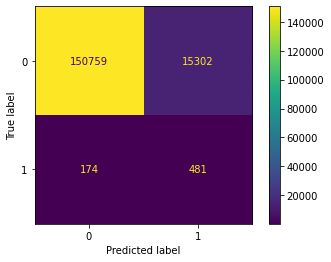

In [48]:
plot_confusion_matrix(lasso_SMOTE, X_test, y_test)

In [49]:
pred_SMOTE = lasso_SMOTE.predict(X_test)
print(classification_report(y_test,pred_SMOTE))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    166061
           1       0.03      0.73      0.06       655

    accuracy                           0.91    166716
   macro avg       0.51      0.82      0.50    166716
weighted avg       1.00      0.91      0.95    166716



# 5.) Which performed best in Out of Sample metrics?

Based on out of sample test results, the best model is the one with undersampling technique.  This could be in the undersampling we only using the actual observations without creating artificial ones. 

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'variable distribution before SMOTE')

<Figure size 1800x900 with 0 Axes>

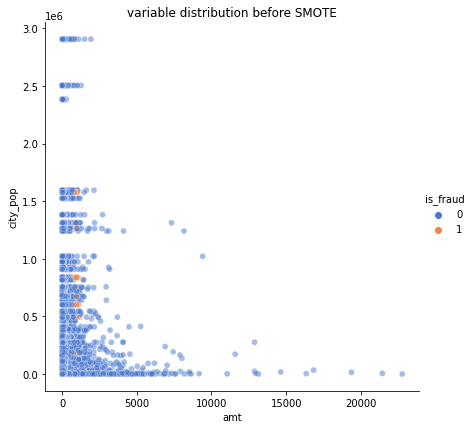

In [51]:
plt.figure(figsize=(12,6), dpi=150)

sns.relplot(x="amt", y="city_pop", hue="is_fraud", alpha=.5, palette="muted",
            height=6, data=df)
plt.title('variable distribution before SMOTE')

In [52]:
after = X_SMOTE.join(y_SMOTE)

Text(0.5, 1.0, 'variable distribution after SMOTE')

<Figure size 1800x900 with 0 Axes>

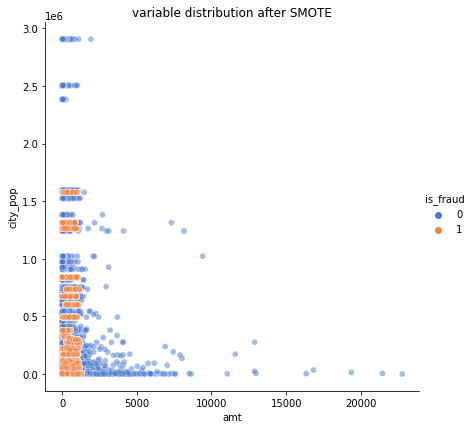

In [53]:
plt.figure(figsize=(12,6), dpi=150)

sns.relplot(x="amt", y="city_pop", hue="is_fraud", alpha=.5, palette="muted",
            height=6, data=after)
plt.title('variable distribution after SMOTE')